<a href="https://colab.research.google.com/github/wilsonhbk/wr67878/blob/main/Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

Import Dataset

In [ ]:
df=pd.read_csv("cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Drop the Unnecessary data columns

In [ ]:
df.drop(columns=["Unnamed: 32",'id'],inplace=True)

Data shape

In [ ]:
df.shape

(569, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Data visualization

```

```



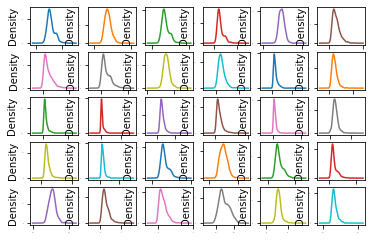

In [ ]:
df.plot(kind='density', subplots=True, layout=(5,6), sharex=False, legend=False, fontsize=1)
plt.show()

<Figure size 2160x2160 with 0 Axes>

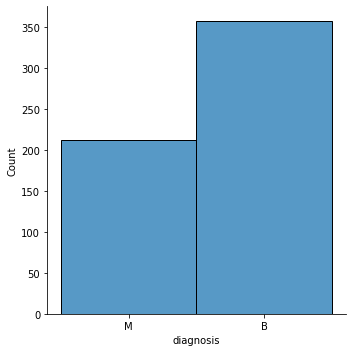

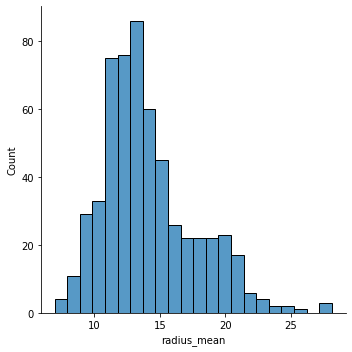

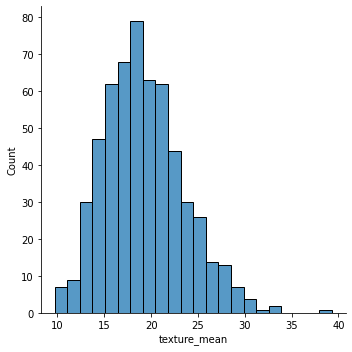

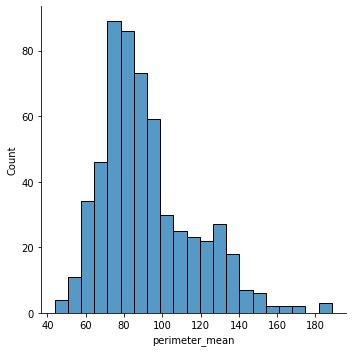

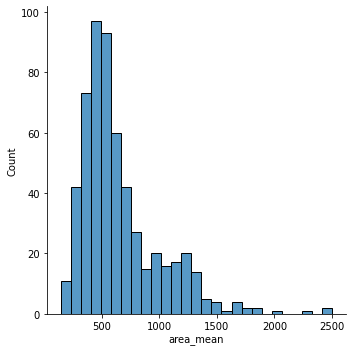

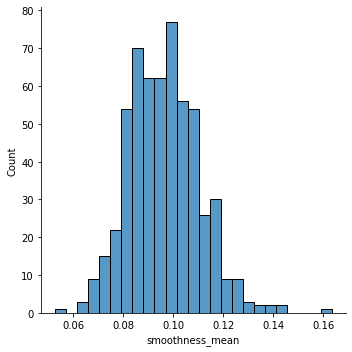

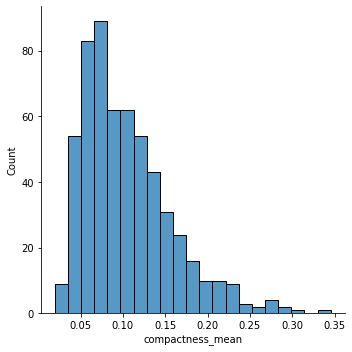

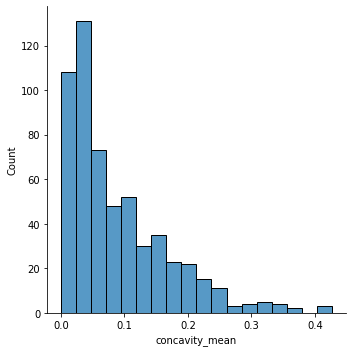

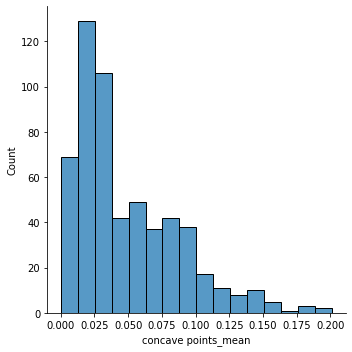

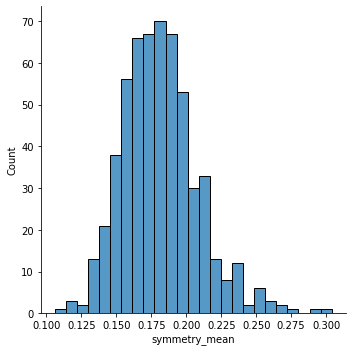

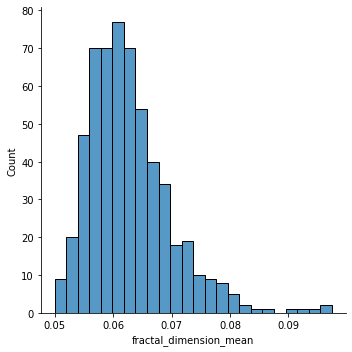

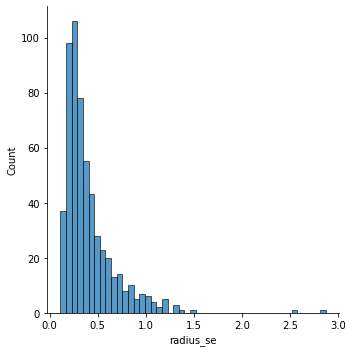

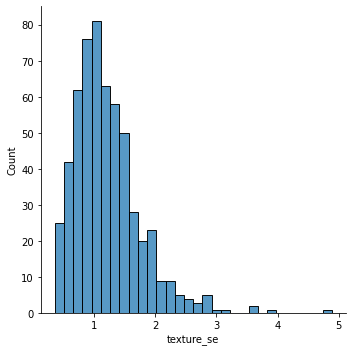

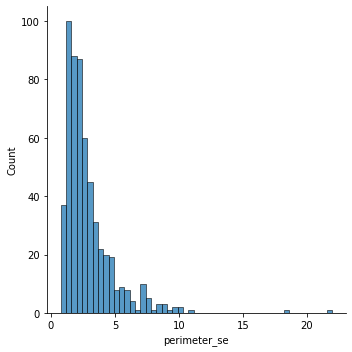

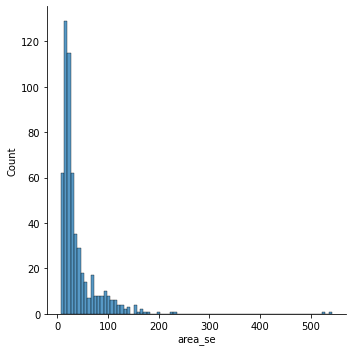

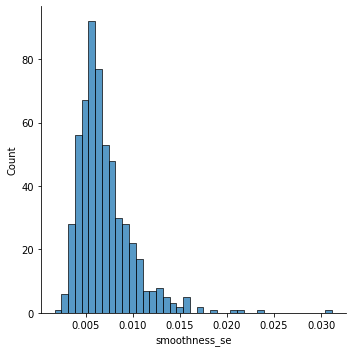

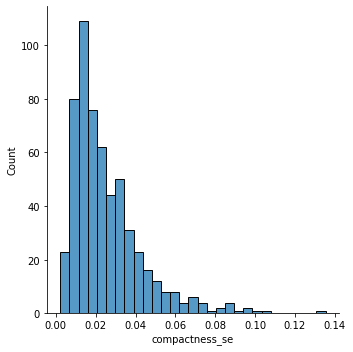

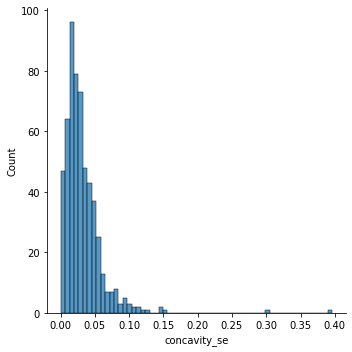

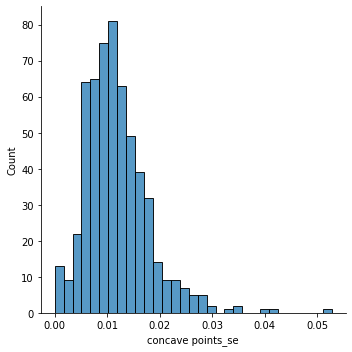

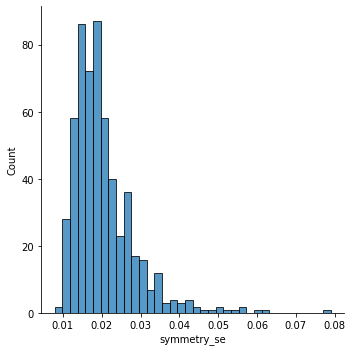

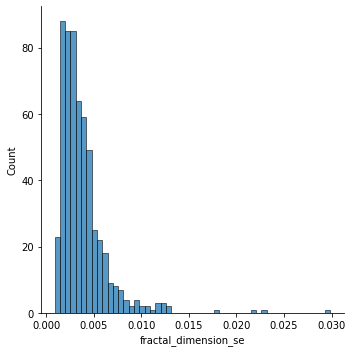

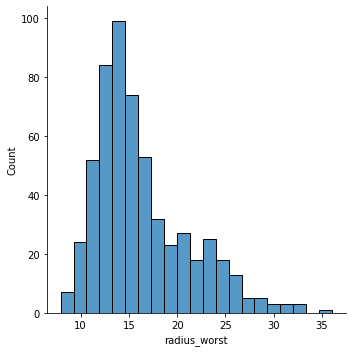

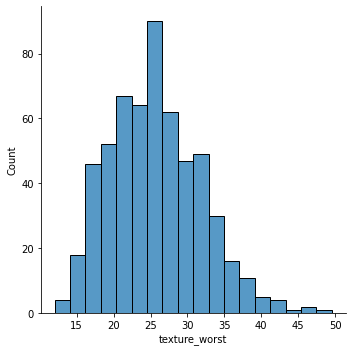

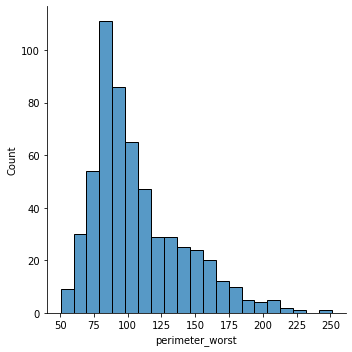

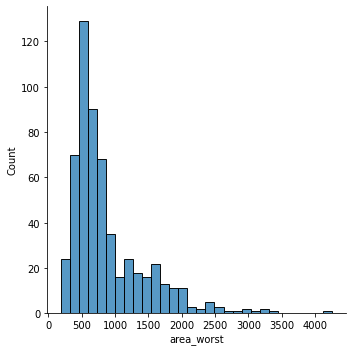

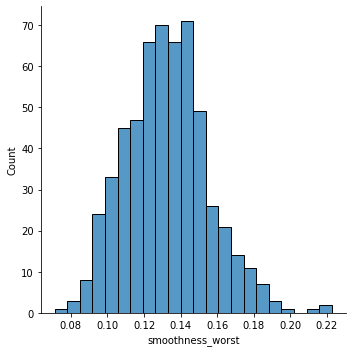

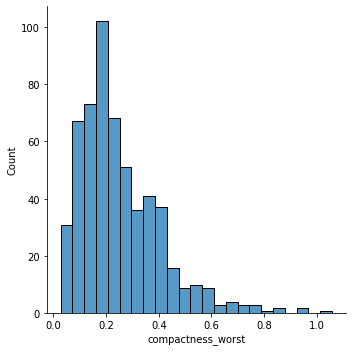

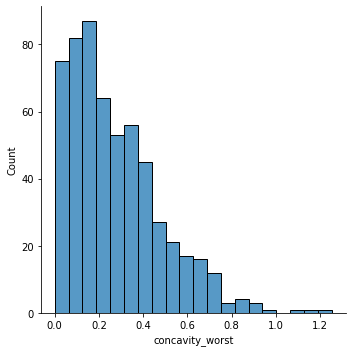

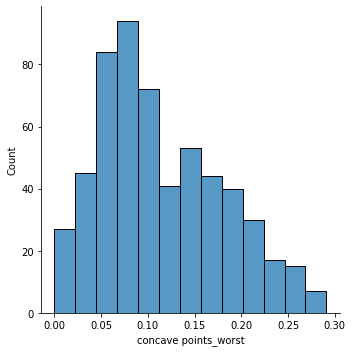

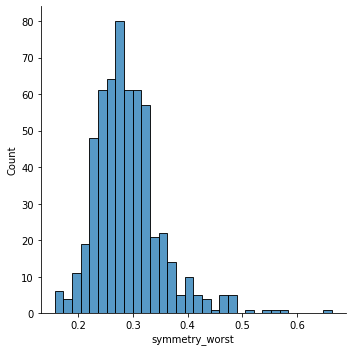

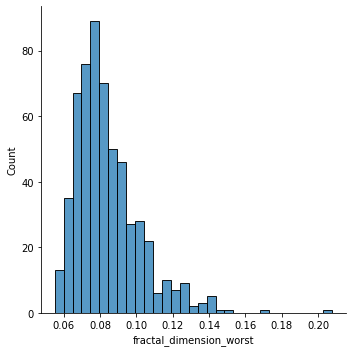

In [ ]:
plt.figure(figsize=(30,30))
for column in df:
  sns.displot(data=df,x=column)
  plt.xlabel(column)
  plt.show()

In [ ]:
corr=df.corr()

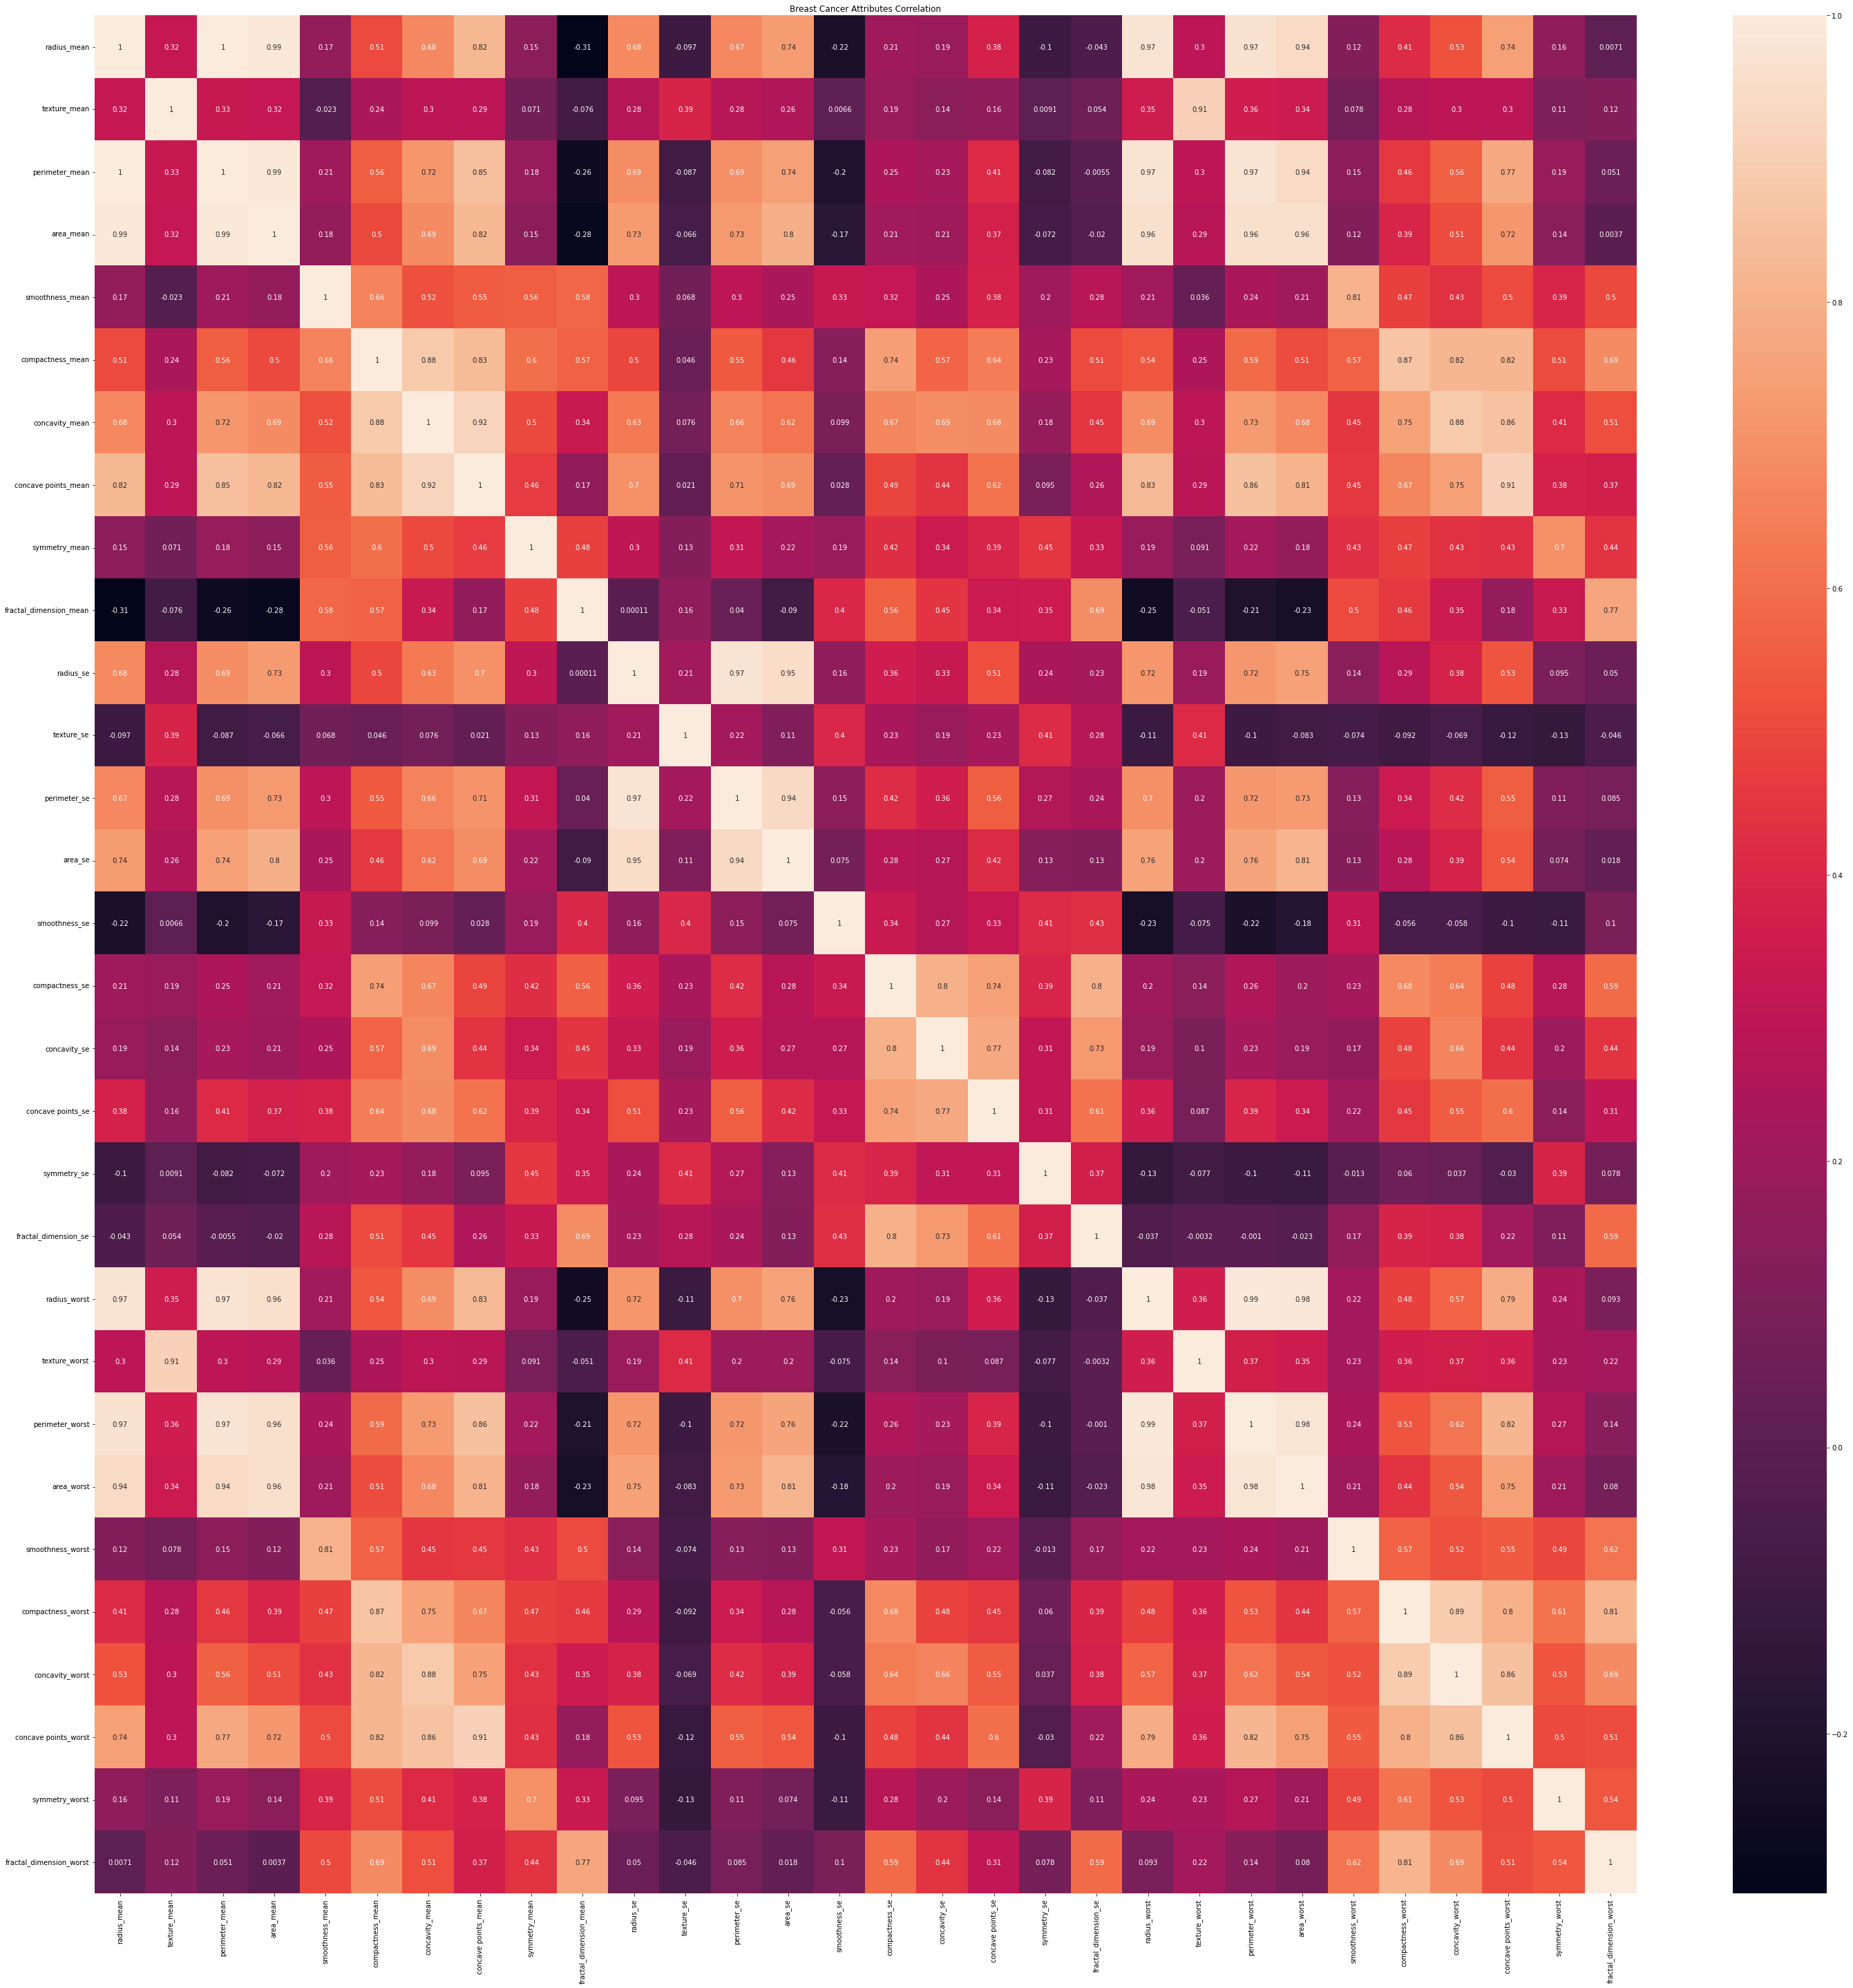

In [ ]:
plt.figure(figsize=(50,50))
#sns.heatmap(df.corr(),annot=True,cmap=blue)
plt.title('Breast Cancer Attributes Correlation')
sns.heatmap(corr,annot =True)
plt.xticks(rotation = 90 )
plt.show() 

Outlier

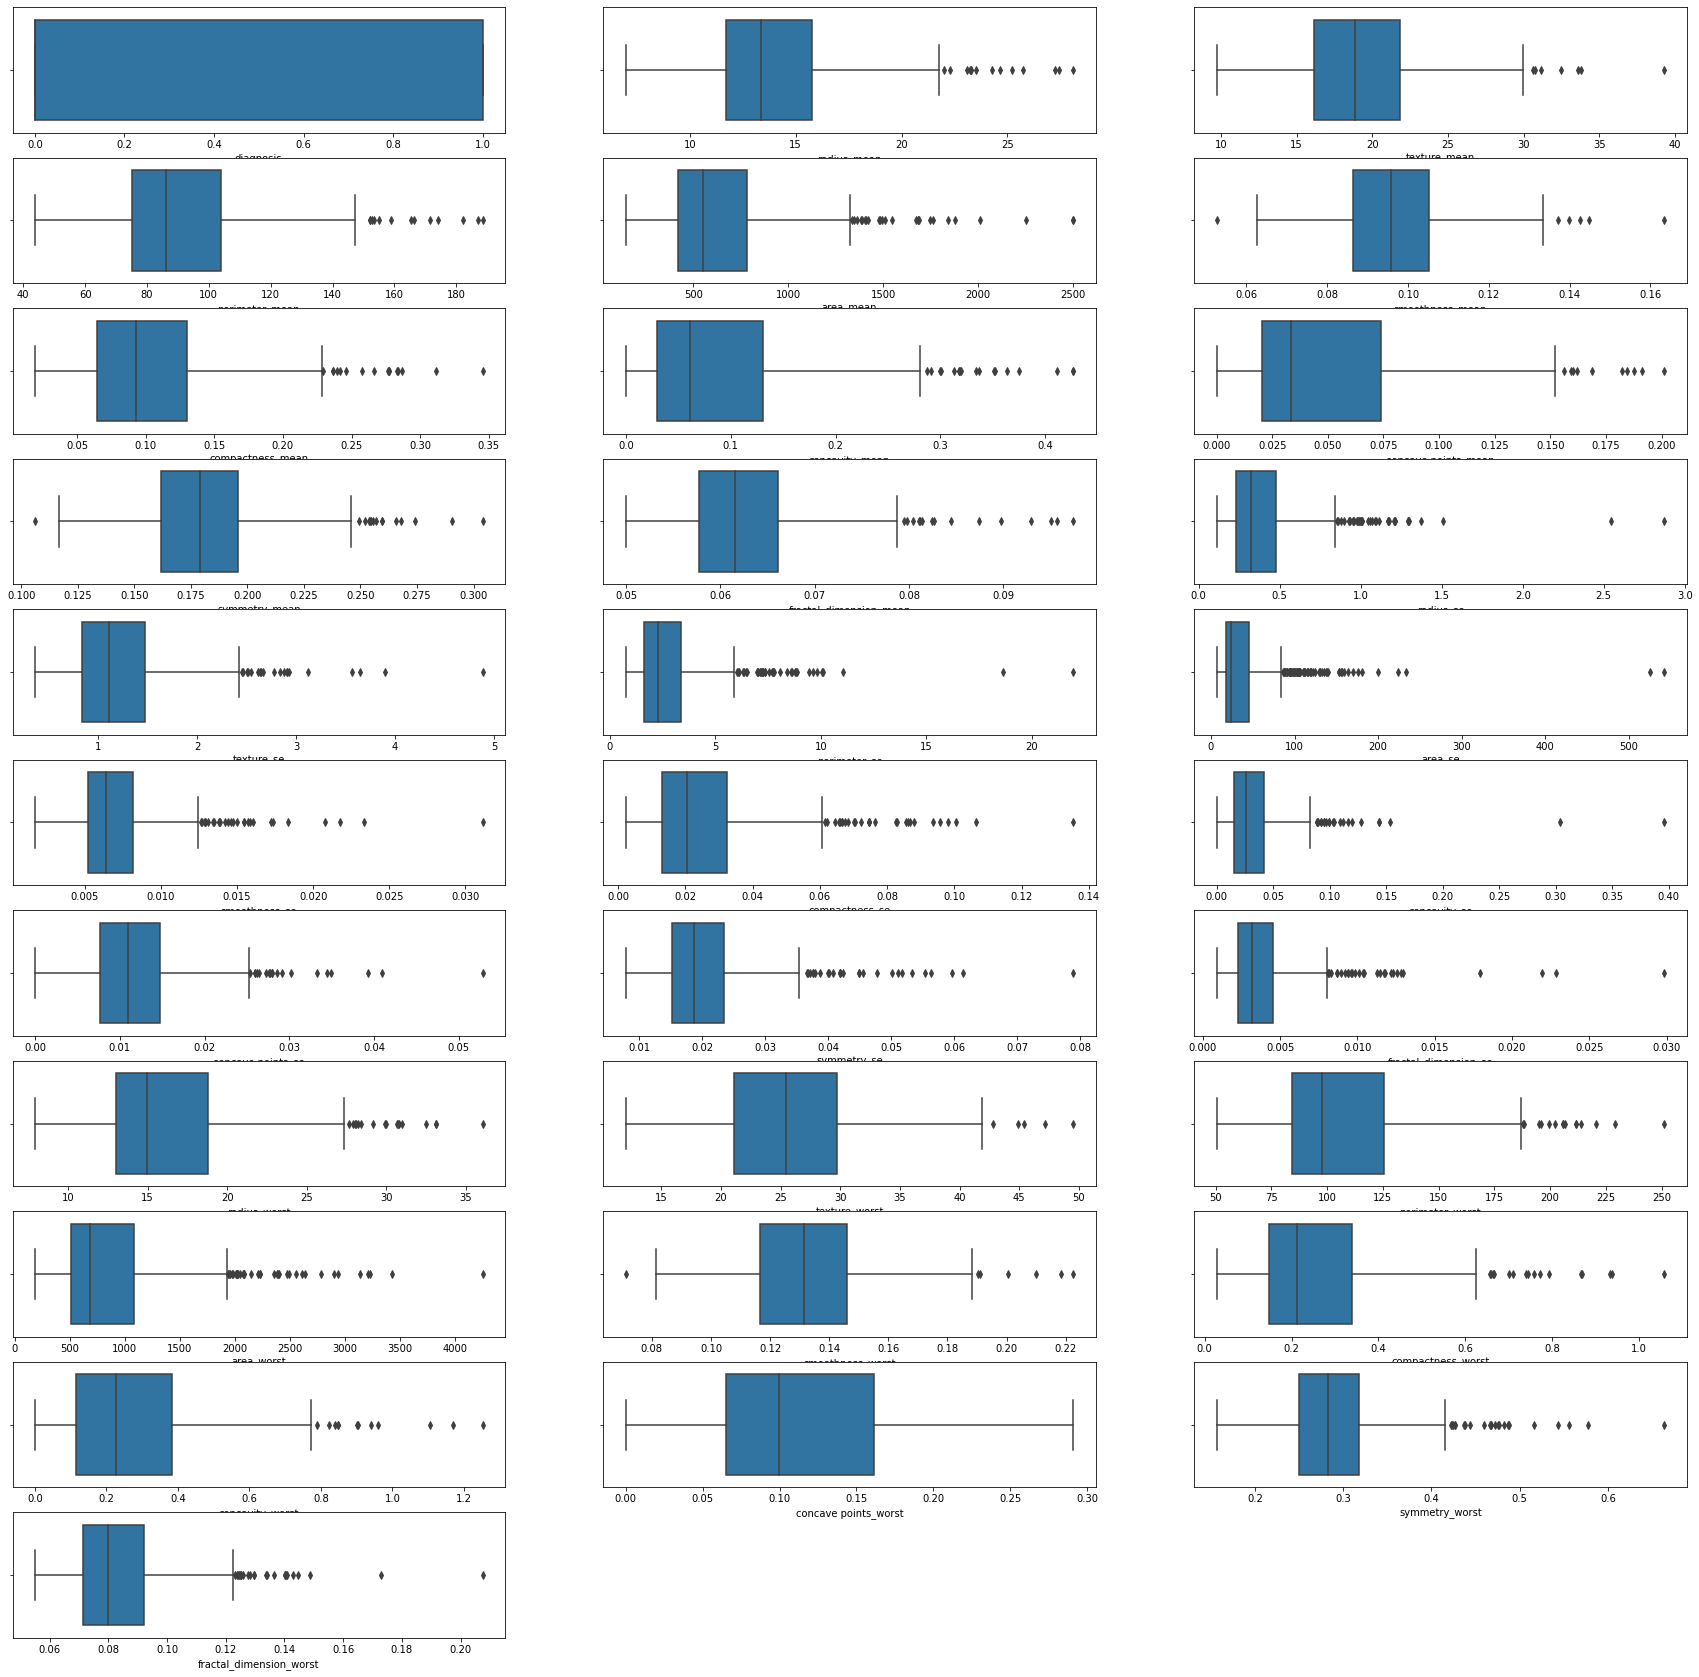

In [ ]:
plt.figure(figsize=(30,30))
i=1
for column in df:
  plt.subplot(11,3,i)
  sns.boxplot(data=df,x=column)
  plt.xlabel(column)
  i=i+1

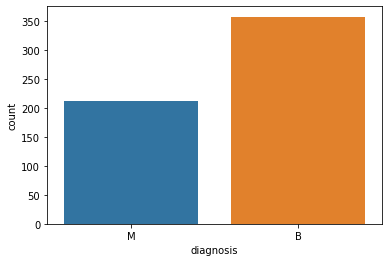

In [ ]:
sns.countplot(data=df,x="diagnosis")

In [ ]:
df["diagnosis"]=df["diagnosis"].map({"M":1,"B":0})

In [ ]:
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Data Preprocessing

In [ ]:
x=df.drop("diagnosis",axis=1)
y=df["diagnosis"]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.fit_transform(x_test)

Implement ML model


 Using Logistic Regression

In [ ]:
logistic_classifier = LogisticRegression(random_state = 0)
logistic_classifier.fit(x_train_scaled,y_train)
     

LogisticRegression(random_state=0)

 Using Decision_tree_classifier

In [ ]:
Decision_tree_classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Decision_tree_classifier.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Svm Classifier

In [ ]:
svm_classifier = SVC(kernel = 'rbf', random_state = 0)
svm_classifier.fit(x_train_scaled,y_train)

SVC(random_state=0)

KNeighbors Classifier

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train_scaled,y_train)

KNeighborsClassifier()

Random Forest Classifier

In [ ]:
random_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_classifier.fit(x_train_scaled,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

predict the test data

In [ ]:
logistic_classifier_pred=logistic_classifier.predict(x_test_scaled)
Decision_tree_classifier_pred=Decision_tree_classifier.predict(x_test_scaled)
svm_classifier_pred=svm_classifier.predict(x_test_scaled)
knn_pred=knn_classifier.predict(x_test_scaled)
random_pred=random_classifier.predict(x_test_scaled)

Accuracy and F1 score

In [ ]:
confusion_matrix(y_test, logistic_classifier_pred)
print("logistic_classifier accuracy score is ", accuracy_score(y_test,logistic_classifier_pred))
print("logistic_classifier F1 score score is ", f1_score(y_test,logistic_classifier_pred))
print("_________________________________________________________________________________")
confusion_matrix(y_test,Decision_tree_classifier_pred)
print("Decision_tree_classifier accuracy score is ", accuracy_score(y_test,Decision_tree_classifier_pred))
print("Decision_tree_classifier F1 score is ", f1_score(y_test,Decision_tree_classifier_pred))
print("_________________________________________________________________________________")
confusion_matrix(y_test, svm_classifier_pred)
print("SVM_classifier accuracy score is ", accuracy_score(y_test,svm_classifier_pred))
print("SVM_classifier F1 score score is ", f1_score(y_test,svm_classifier_pred))
print("_________________________________________________________________________________")
confusion_matrix(y_test,knn_pred)
print("KNN accuracy score is ", accuracy_score(y_test,knn_pred))
print("KNN F1 score is ", f1_score(y_test,knn_pred))
print("_________________________________________________________________________________")
confusion_matrix(y_test,random_pred)
print("random accuracy score is ", accuracy_score(y_test,random_pred))
print("random F1 score is ", f1_score(y_test,random_pred))

logistic_classifier accuracy score is  0.958041958041958
logistic_classifier F1 score score is  0.9444444444444444
_________________________________________________________________________________
Decision_tree_classifier accuracy score is  0.9440559440559441
Decision_tree_classifier F1 score is  0.9259259259259259
_________________________________________________________________________________
SVM_classifier accuracy score is  0.965034965034965
SVM_classifier F1 score score is  0.9523809523809524
_________________________________________________________________________________
KNN accuracy score is  0.951048951048951
KNN F1 score is  0.9306930693069307
_________________________________________________________________________________
random accuracy score is  0.9790209790209791
random F1 score is  0.9719626168224299


Evaluation using ROC curve

In [ ]:
print("logistic_classifier ROC score is ", roc_auc_score(y_test,logistic_classifier_pred))
print("Decision_tree_classifier ROC score is ", roc_auc_score(y_test,Decision_tree_classifier_pred))
print("SVM_classifier ROC score is ", roc_auc_score(y_test,svm_classifier_pred))
print("knn_classifier ROC score is ", roc_auc_score(y_test,knn_pred))
print("random_classifier ROC score is ", roc_auc_score(y_test,random_pred))

logistic_classifier ROC score is  0.958909853249476
Decision_tree_classifier ROC score is  0.9439203354297694
SVM_classifier ROC score is  0.960587002096436
knn_classifier ROC score is  0.9378406708595388
random_classifier ROC score is  0.979454926624738


Among all the classifier Random Forest model gives the very good accuracy, F1 score and AUROC score values